In [1]:
#Importing pandas and numpy libraries
import numpy as np
import pandas as pd

In [2]:
#Importing the train and test data
train = pd.read_csv("../train.csv")
test = pd.read_csv("../test.csv")

In [3]:
#Checking the head of train dataframe
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [4]:
#Checkinig the info of all the variables in train dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
ID                32561 non-null int64
Age               32561 non-null int64
Workclass         30725 non-null object
Education         32561 non-null object
Marital.Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Hours.Per.Week    32561 non-null int64
Native.Country    31978 non-null object
Income.Group      32561 non-null object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


Variables with null values:<br>
<b>Workclass</b> - 1836<br>
<b>Occupation</b> - 1843<br>
<b>Native.Country</b> - 583

In [5]:
#Checking the column names, to check if they have any spaces in between the characters
train.columns

Index(['ID', 'Age', 'Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Hours.Per.Week', 'Native.Country',
       'Income.Group'],
      dtype='object')

In [6]:
#Getting general info for the continous variables such as mean, std, count, max_value, min_value
train[['Age','Hours.Per.Week']].describe()

,Age,Hours.Per.Week
count,32561.000000,32561.000000
mean,38.581647,40.437456
std,13.640433,12.347429
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


We can calculate Interquartile Range for 'Age' and 'Hours.Per.Week' by using the formula: IQR = Q3(75%) - Q1(25%) <br>
IQR (Age) = 48 - 28 = 20 <br>
IQR (Hours.Per.Week) = 45 - 40 = 5

In [7]:
#Analysing categorical variables
# Getting indices(column names) of all the columns having datatype as 'object'
categorical_variables = train.dtypes.loc[train.dtypes == 'object'].index
categorical_variables

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [8]:
#Getting the number of unique values for all categorical variables
train[categorical_variables].apply(lambda x : x.nunique())

Workclass          8
Education         16
Marital.Status     7
Occupation        14
Relationship       6
Race               5
Sex                2
Native.Country    41
Income.Group       2
dtype: int64

We can see that 'Education', 'Occupation' and 'Native.Country' has more than 10 unique values, which seems too high.

In [9]:
#Analyzing Workclass, Printing the occurences of each unique value along with the percentage each occupy in the column
print(str(train['Workclass'].value_counts()) + '\n')
print(train['Workclass'].value_counts()/len(train['Workclass']))

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: Workclass, dtype: float64


In [10]:
#Analyzing Marital.Status, Printing the occurences of each unique value along with the percentage each occupy in the column
print(str(train['Marital.Status'].value_counts()) + '\n')
print(train['Marital.Status'].value_counts()/len(train['Marital.Status']))

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Marital.Status, dtype: int64

Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: Marital.Status, dtype: float64


In [11]:
#Analyzing Relationship, Printing the occurences of each unique value along with the percentage each occupy in the column
print(str(train['Relationship'].value_counts()) + '\n')
print(train['Relationship'].value_counts()/len(train['Relationship']))

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: Relationship, dtype: int64

Husband           0.405178
Not-in-family     0.255060
Own-child         0.155646
Unmarried         0.105832
Wife              0.048156
Other-relative    0.030128
Name: Relationship, dtype: float64


In [12]:
#Analyzing Race, Printing the occurences of each unique value along with the percentage each occupy in the column
print(str(train['Race'].value_counts()) + '\n')
print(train['Race'].value_counts()/len(train['Race']))

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64


In [13]:
#Analyzing Sex, Printing the occurences of each unique value along with the percentage each occupy in the column
print(str(train['Sex'].value_counts()) + '\n')
print(train['Sex'].value_counts()/len(train['Sex']))

Male      21790
Female    10771
Name: Sex, dtype: int64

Male      0.669205
Female    0.330795
Name: Sex, dtype: float64


In [14]:
#Analyzing Income.Group, Printing the occurences of each unique value along with the percentage each occupy in the column
print(str(train['Income.Group'].value_counts()) + '\n')
print(train['Income.Group'].value_counts()/len(train['Income.Group']))

<=50K    24720
>50K      7841
Name: Income.Group, dtype: int64

<=50K    0.75919
>50K     0.24081
Name: Income.Group, dtype: float64


In [15]:
#Analyzing Education, Printing the occurences of each unique value along with the percentage each occupy in the column
print(str(train['Education'].value_counts()) + '\n')
print(train['Education'].value_counts()/len(train['Education']))

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64

HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: Education, dtype: float64


In [16]:
#Analyzing Occupation, Printing the occurences of each unique value along with the percentage each occupy in the column
print(str(train['Occupation'].value_counts()) + '\n')
print(train['Occupation'].value_counts()/len(train['Occupation']))

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

Prof-specialty       0.127146
Craft-repair         0.125887
Exec-managerial      0.124873
Adm-clerical         0.115783
Sales                0.112097
Other-service        0.101195
Machine-op-inspct    0.061485
Transport-moving     0.049046
Handlers-cleaners    0.042075
Farming-fishing      0.030527
Tech-support         0.028500
Protective-serv      0.019932
Priv-house-serv      0.004576
Armed-Forces         0.000276
Name: Occupation, dtype: float64


In [17]:
#Analyzing Native.Country, Printing the occurences of each unique value along with the percentage each occupy in the column
print(str(train['Native.Country'].value_counts()) + '\n')
print(train['Native.Country'].value_counts()/len(train['Native.Country']))

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

<b> Multivariate Analysis to check assocaiation/correlation between the variables. Three combinations are possible for two variables: </b>
1. Categorical - Catgorical <br>
2. Categorical - Continous <br>
3. Continous - Continous

In [18]:
#Imporing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h3><b>Categorical - Categorical</b></h3>

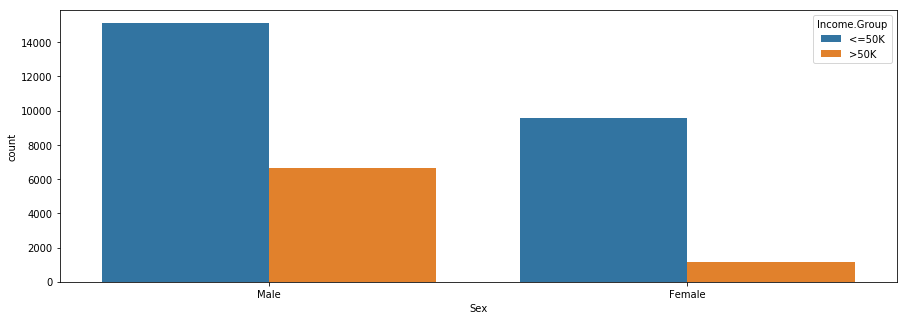

In [19]:
#Checking the Number of Males and Females for each Income Group
plt.rcParams['figure.figsize'] = (15,5)
sns.countplot(x=train['Sex'], hue=train['Income.Group'])

In [20]:
#Checking the Number of Males and Females for each Income Group, by printing the crosstabulation
tb = pd.crosstab(train['Income.Group'], train['Sex'], margins=True)
tb

Sex,Female,Male,All
Income.Group,,,
<=50K,9592,15128,24720
>50K,1179,6662,7841
All,10771,21790,32561


In [21]:
#From the above table we can calculate the percentage of Male and Female for each group, which would be very intutive.
print('Male (%) for <=50K : {}'.format((tb.iloc[0,1]/tb.iloc[2,1]) * 100))
print('Female (%) for <=50K : {}'.format((tb.iloc[0,0]/tb.iloc[2,0]) * 100))
print('Male (%) for >50K : {}'.format((tb.iloc[1,1]/tb.iloc[2,1]) * 100))
print('Female (%) for >50K : {}'.format((tb.iloc[1,0]/tb.iloc[2,0]) * 100))

Male (%) for <=50K : 69.42634235888022
Female (%) for <=50K : 89.05394113824158
Male (%) for >50K : 30.573657641119777
Female (%) for >50K : 10.946058861758425


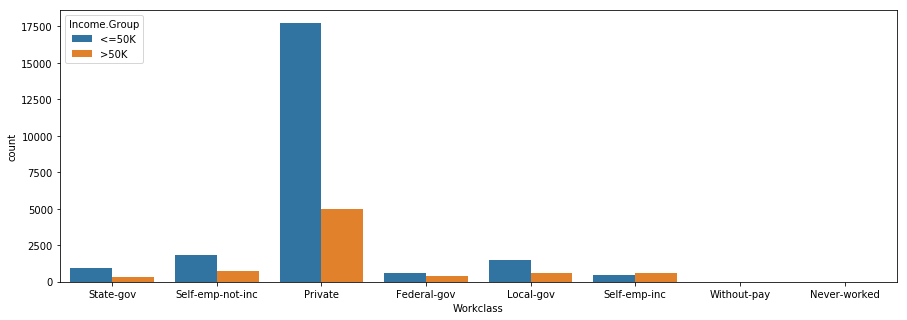

In [22]:
#Checking the relationship between Workclass and Income.Group
sns.countplot(x=train['Workclass'], hue=train['Income.Group'])

In [23]:
#Checking the relationship between Workclass and Income.Group, by printing the crosstabulation
tb = pd.crosstab(train['Income.Group'], train['Workclass'], margins=True)
tb

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income.Group,,,,,,,,,
<=50K,589,1476,7,17733,494,1817,945,14,23075
>50K,371,617,0,4963,622,724,353,0,7650
All,960,2093,7,22696,1116,2541,1298,14,30725


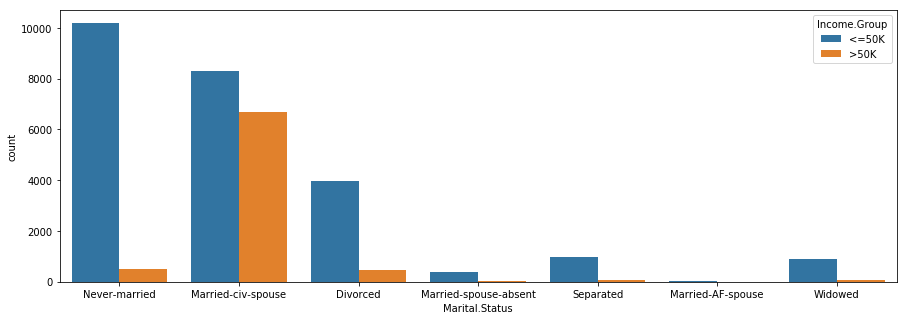

In [24]:
#Checking the relationship between Marital.Status and Income.Group
sns.countplot(x=train['Marital.Status'], hue=train['Income.Group'])

In [25]:
#Checking the relationship between Marital.Status and Income.Group, by printing the crosstabulation
tb = pd.crosstab(train['Income.Group'], train['Marital.Status'], margins=True)
tb

Marital.Status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,All
Income.Group,,,,,,,,
<=50K,3980,13,8284,384,10192,959,908,24720
>50K,463,10,6692,34,491,66,85,7841
All,4443,23,14976,418,10683,1025,993,32561


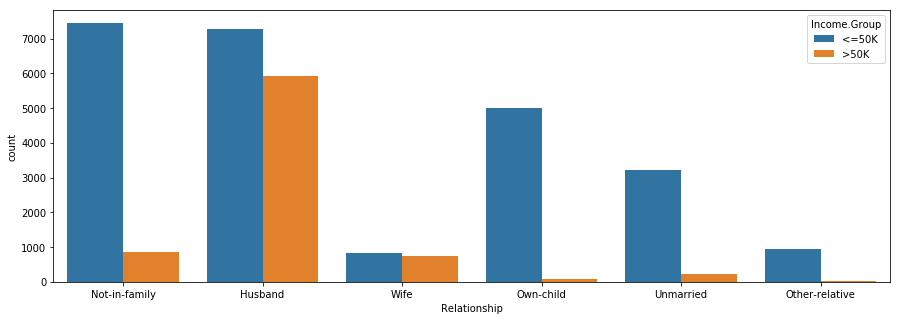

In [26]:
#Checking the relationship between Relationship and Income.Group
sns.countplot(x=train['Relationship'], hue=train['Income.Group'])

In [27]:
#Checking the relationship between Relationship and Income.Group, by printing the crosstabulation
tb = pd.crosstab(train['Income.Group'], train['Relationship'], margins=True)
tb

Relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,All
Income.Group,,,,,,,
<=50K,7275,7449,944,5001,3228,823,24720
>50K,5918,856,37,67,218,745,7841
All,13193,8305,981,5068,3446,1568,32561


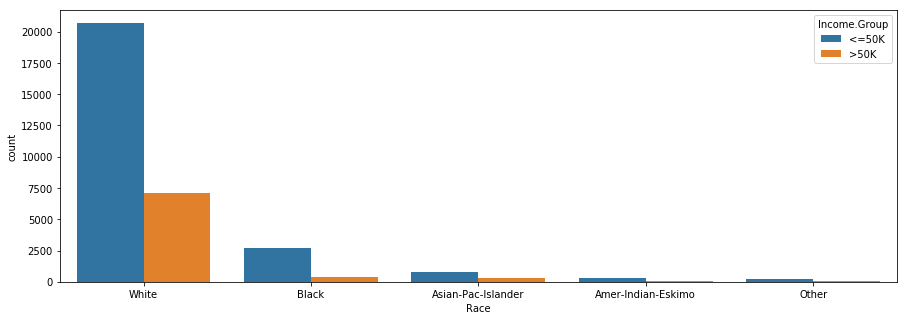

In [28]:
#Checking the relationship between Race and Income.Group
sns.countplot(x=train['Race'], hue=train['Income.Group'])

In [29]:
#Checking the relationship between Race and Income.Group, by printing the crosstabulation
tb = pd.crosstab(train['Income.Group'], train['Race'], margins=True)
tb

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
Income.Group,,,,,,
<=50K,275,763,2737,246,20699,24720
>50K,36,276,387,25,7117,7841
All,311,1039,3124,271,27816,32561


In [30]:
#Checking the relationship between occupation and Income.Group, by printing the crosstabulation
tb = pd.crosstab(train['Income.Group'], train['Occupation'], margins=True)
tb

Occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,All
Income.Group,,,,,,,,,,,,,,,
<=50K,3263,8,3170,2098,879,1284,1752,3158,148,2281,438,2667,645,1277,23068
>50K,507,1,929,1968,115,86,250,137,1,1859,211,983,283,320,7650
All,3770,9,4099,4066,994,1370,2002,3295,149,4140,649,3650,928,1597,30718


<h3><b> Categorical - Continous </b></h3>

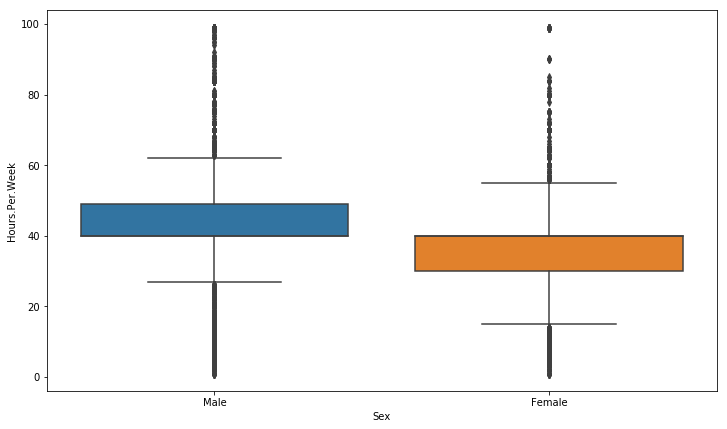

In [31]:
#Checking Relationship between Sex and Hours.Per.Week
plt.rcParams['figure.figsize'] = (12,7)
sns.boxplot(train['Sex'], train['Hours.Per.Week'])

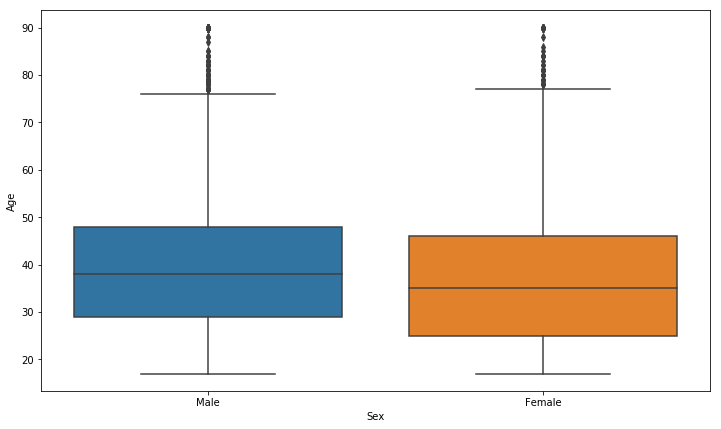

In [32]:
#Checking Relationship between Sex and Age
sns.boxplot(train['Sex'], train['Age'])

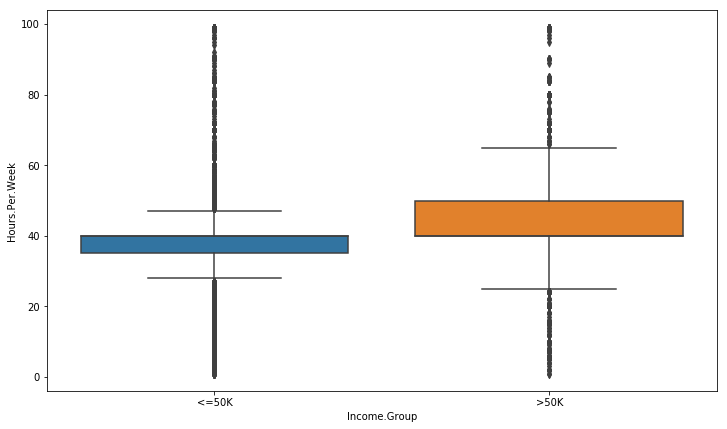

In [33]:
#Checking Relationship between Income.Group and Hours.Per.Week
sns.boxplot(train['Income.Group'], train['Hours.Per.Week'])

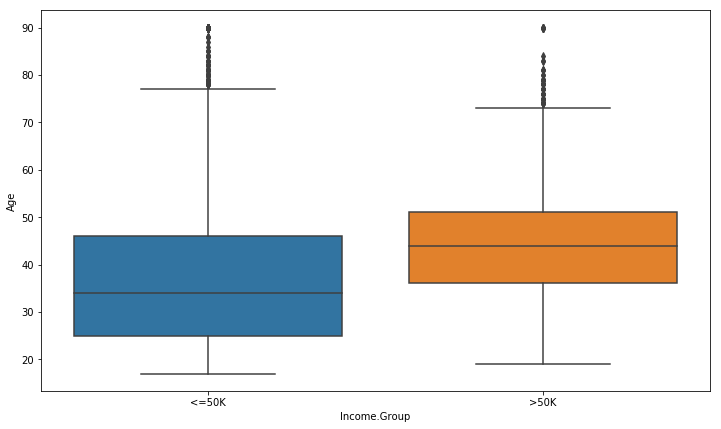

In [34]:
#Checking Relationship between Income.Group and Age
sns.boxplot(train['Income.Group'], train['Age'])

<h3><b> Continous - Continous </b></h3>

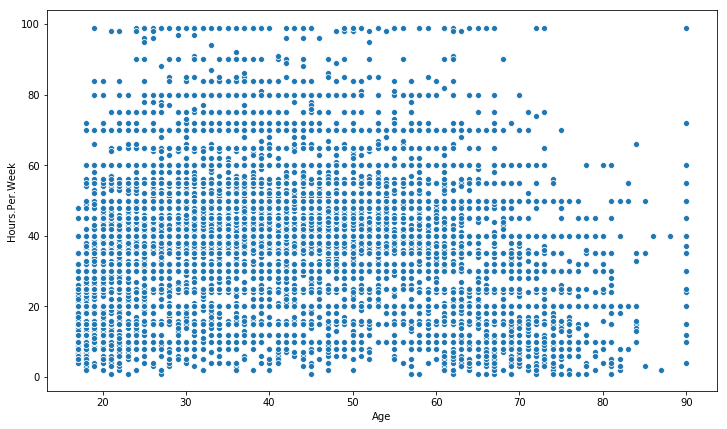

In [35]:
#Relation between Age and Hours.Per.Week
sns.scatterplot(train['Age'], train['Hours.Per.Week'])

It can be seen from the above scatter plot that there is no relationship between Age and Hours.Per.Week

In [36]:
np.corrcoef(train['Age'], train['Hours.Per.Week'])

array([[1.        , 0.06875571],
       [0.06875571, 1.        ]])

<h3><b> Missing Value Treatment </b></h3><br>
Let's check again what columns have missing values in both train and test data

In [37]:
train.apply(lambda x : sum(x.isnull()))

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64

In [38]:
test.apply(lambda x : sum(x.isnull()))

ID                  0
Age                 0
Workclass         963
Education           0
Marital.Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Hours.Per.Week      0
Native.Country    274
dtype: int64

Three columns in both train and test data have missing values. These three are categorical columns, so we can fill the missing values by putting mode (value with max occurence) of the corresponding column.

In [39]:
train['Workclass'].mode().iloc[0]

'Private'

In [40]:
#Fill the missing values with mode for train and test data
vars_to_impute = ['Workclass','Occupation','Native.Country']
for i in vars_to_impute:
    train[i].fillna(train[i].mode()[0], inplace=True)
    test[i].fillna(test[i].mode()[0], inplace=True)

In [41]:
#Checking if missing values are filled
print(str(train.apply(lambda x : sum(x.isnull()))) + '\n')
print(test.apply(lambda x : sum(x.isnull())))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
dtype: int64


<h3><b> Outlier Treatment </b></h3>

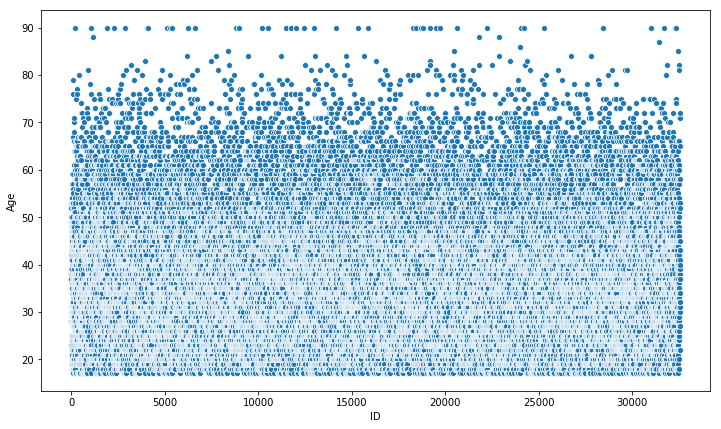

In [42]:
#Scatter plot for Age and Id
sns.scatterplot(train['ID'], train['Age'])

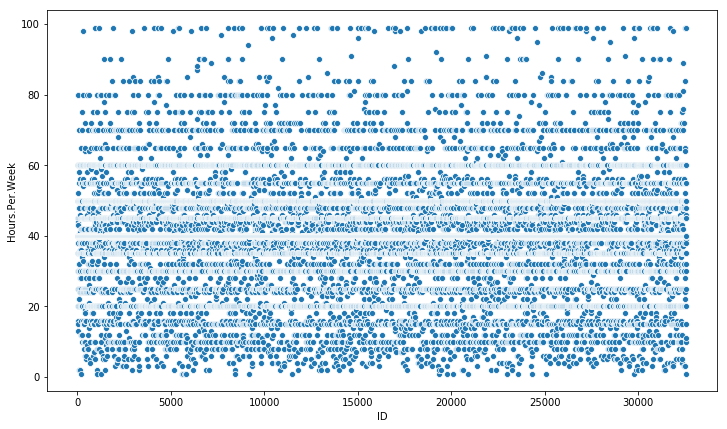

In [43]:
#Scatter plot for ID and Hours.Per.Week
sns.scatterplot(train['ID'], train['Hours.Per.Week'])

In [44]:
#Checking if Age and Hours.Per.Week contain any 0 or negative value
print('Number of Zero or negative values in Age column : {}'.format(sum(train['Age'] <= 0)))
print('Number of Zero or negative values in Hours.Per.Week column : {}'.format(sum(train['Hours.Per.Week'] <= 0)))

Number of Zero or negative values in Age column : 0
Number of Zero or negative values in Hours.Per.Week column : 0


From the above scatter plots, we can see that there is/are no value(s) that can be considered as outlier(s).

<h3><b> Variable Transformation </b></h3><br>
We have seen that three categorical variables have more than 10 unique values. We have also calculated the percentage occurence of each value in the categorical variables. <br>
Now, we will set a threshold (say 5% or 0.05) according to which all the values whose percentage occurences are less than 5% will be merged in a new category.

In [45]:
categorical_variables[:-1]

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country'],
      dtype='object')

<h5><b> The below code has been used as a basis to generalize the transformation for all categorical variables</b></h5> <br>
per_occ = (train['Workclass'].value_counts()/len(train) < 0.05)<br>
a = per_occ.loc[per_occ].index<br>
if(len(a) > 0):<br>
  &emsp;  print(train['Workclass'].replace(to_replace=a, value='Others').value_counts())

In [46]:
# Logic for merging the categories having percentage occurence of less than 5% into a new category, for all categorical 
# variables
for i in categorical_variables[:-1]:
    """Below statement will store True/False values for categories based on the condition"""
    per_occ_train = train[i].value_counts()/len(train[i]) < 0.05
    per_occ_test = test[i].value_counts()/len(test[i]) < 0.05
    #print(per_occ_train)  # For debugging purpose
    #print(per_occ_test)   # For dubugging purpose
    
    """Below statement will fetch the categories having < 5% occurence, based on the above statement"""
    categories_to_merge_train = per_occ_train.loc[per_occ_train].index
    categories_to_merge_test = per_occ_test.loc[per_occ_test].index
    #print(categories_to_merge_train)  # For debugging purpose
    #print(categories_to_merge_test)  # For debugging purpose
    
    if(len(categories_to_merge_train) > 0):   # Used to prevent ValeError that will arise incase there are no categories to merge
        train[i].replace(to_replace=categories_to_merge_train, value='Others', inplace=True)
        test[i].replace(to_replace=categories_to_merge_test, value='Others', inplace=True)
        #print(train[i].replace(to_replace=categories_to_merge, value='Others').value_counts()/len(train[i]))

In [47]:
#Getting the number of unique values for all categorical variables (Train and Test data)
print(str(train[categorical_variables].apply(lambda x : x.nunique())) + '\n')
print(test[categorical_variables[:-1]].apply(lambda x : x.nunique()))

Workclass         4
Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native.Country    2
Income.Group      2
dtype: int64

Workclass         4
Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native.Country    2
dtype: int64


<h3><b> Data Preprocessing/encoding the categorical variables </b></h3>

In [48]:
#Importing Label and OneHot encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [49]:
#LabelEncoding for tree based models
le = LabelEncoder()
for i in categorical_variables:
    train[i] = le.fit_transform(train[i])
    if(i != 'Income.Group'):
        test[i] = le.fit_transform(test[i])

In [50]:
#Checking the head of train and test data
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,1,0,2,0,1,2,1,40,1,0
1,2,50,3,0,1,2,0,2,1,13,1,0
2,3,38,2,1,0,5,1,2,1,40,1,0
3,4,53,2,3,1,5,0,0,1,40,1,0
4,5,28,2,0,1,6,2,0,0,40,0,0


In [51]:
test.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country
0,32562,25,2,3,2,3,3,0,1,40,1
1,32563,38,2,1,1,5,0,2,1,50,1
2,32564,28,0,3,1,5,0,2,1,40,1
3,32565,44,2,4,1,3,0,0,1,40,1
4,32566,18,2,4,2,6,3,2,0,30,1


<h3><b> Model fitting and performance checking </b></h3>

In [52]:
#Train Test Split to check the performance
from sklearn.model_selection import train_test_split

In [53]:
X = train.iloc[:,1:-1].values
y = train.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
#Importing DecisionTree and RandomForest classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [55]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=10, min_samples_leaf=100, max_features='sqrt')
rfc = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=0, max_depth=10, min_samples_leaf=100, max_features='sqrt')

In [56]:
#Fitting the classifier on the training data
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [57]:
#Predicting the values for test data to compare with actual values
y_pred = dtc.predict(X_test)

In [58]:
#Importing Confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [59]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy Score : {}'.format(accuracy_score(y_test, y_pred)))

[[6723  732]
 [1204 1110]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      7455
           1       0.60      0.48      0.53      2314

   micro avg       0.80      0.80      0.80      9769
   macro avg       0.73      0.69      0.70      9769
weighted avg       0.79      0.80      0.79      9769

Accuracy Score : 0.8018220902855973


In [61]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [62]:
y_pred = rfc.predict(X_test)

In [63]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy Score : {}'.format(accuracy_score(y_test, y_pred)))

[[6987  468]
 [1262 1052]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7455
           1       0.69      0.45      0.55      2314

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.77      0.70      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy Score : 0.8229092025795884


We can see that RandomForest classifier outperforms DecisionTree classifier with same hyperparameter values for both of them.

In [64]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression

In [121]:
lr = LogisticRegression(C=0.05, intercept_scaling=0.85)  #0.8  0.9

In [122]:
lr.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=0.85, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [123]:
y_pred = lr.predict(X_test)

In [124]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy Score : {}'.format(accuracy_score(y_test, y_pred)))

[[7025  430]
 [1712  602]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      7455
           1       0.58      0.26      0.36      2314

   micro avg       0.78      0.78      0.78      9769
   macro avg       0.69      0.60      0.61      9769
weighted avg       0.75      0.78      0.75      9769

Accuracy Score : 0.7807349779916061
